# Variables & Data Types

In [4]:
from shared import thinkpython

ModuleNotFoundError: No module named 'shared'

In the previous chapter, we used operators to write expressions that perform arithmetic computations.

In this chapter, you'll learn about variables and statements, the `import` statement, and the `print` function.
And I'll introduce more of the vocabulary we use to talk about programs, including "argument" and "module".

In [7]:
# %pip install matplotlib  ### uncomment this line if matplotlib is not installed.
                            ### comment it out once matplotlib is installed.
import thinkpython, diagram, jupyturtle

ModuleNotFoundError: No module named 'diagram'

```{index} state diagram
```
### State diagrams

A common way to represent variables on paper is to write the name with an arrow pointing to its value. 

In [8]:
import math

from diagram import make_binding, Frame

binding = make_binding("message", 'And now for something completely different')
binding2 = make_binding("n", 17)
binding3 = make_binding("pi", 3.141592653589793)

frame = Frame([binding2, binding3, binding])

ModuleNotFoundError: No module named 'diagram'

NameError: name 'frame' is not defined

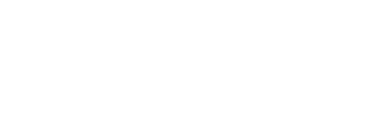

In [1]:
from diagram import diagram, adjust

width, height, x, y = [3.62, 1.01, 0.6, 0.76]
ax = diagram(width, height)
bbox = frame.draw(ax, x, y, dy=-0.25)
adjust(x, y, bbox)

This kind of figure is called a **state diagram** because it shows what state each of the variables is in (think of it as the variable's state of mind).
We'll use state diagrams throughout the book to represent a model of how Python stores variables and their values.

```{index} variable: naming
```
### Naming Convention

General Python variable naming follows the convention from the [PEP 8 style guidelines](https://peps.python.org/pep-0008/#naming-conventions):

1. Length: Names can be as long as you like.
2. Containing: They can contain alphanumeric characters (letters and numbers) and underscores. Special characters (e.g., @, #, $) are not allowed.
3. Begin with: Can begin with an underscore or a letter, but can't begin with a number.
4. Letter Case:
   1. It is conventional to use only **lowercase** letters for variable names, although it is legal to use uppercase letters.
   2. Names are case-sensitive. `age`, `Age`, and `AGE` are three distinct variables.
   3. Use **`snake_case`**: All lowercase with underscores between words. Example: total_price, student_name, is_active.
   4. Class/type names follow the CapWords, or `upper camel case`, convention. 
7. Avoid **keywords** and **built-in function** names for naming variables.
8. Constants: Constants are usually defined on a module level and written in all capital letters with underscores separating words.

The only punctuation that can appear in a variable name is the underscore character, `_`. It is often used in names with multiple words, such as `your_name` or  `airspeed_of_unladen_swallow`.

If you give a variable an illegal name, you get a syntax error.
The name `million!` is illegal because it contains punctuation.

In [14]:
%%expect SyntaxError

million! = 1000000

SyntaxError: invalid syntax (4061783710.py, line 1)

`76trombones` is illegal because it starts with a number.

In [15]:
%%expect SyntaxError

76trombones = 'big parade'

SyntaxError: invalid decimal literal (3636686625.py, line 1)

`class` is also illegal, but it might not be obvious why.

In [16]:
%%expect SyntaxError

class = 'Self-Defense Against Fresh Fruit'

SyntaxError: invalid syntax (3200450540.py, line 1)

In [17]:
from keyword import kwlist

print("Number of Python keywords:", len(kwlist))
print("First five Python keywords:", kwlist[0:5])

Number of Python keywords: 35
First five Python keywords: ['False', 'None', 'True', 'and', 'as']


```{index} keywords
```
## Python Keywords 

In the case of `class = 'Self-Defense Against Fresh Fruit'`, it turns out that `class` is a **keyword**, and keywords cannot be used as variable names. Keywords are special words reserved by the programming language to be used to specify the structure of a program.

Here's a complete list of [35 Python keywords](https://docs.python.org/3/reference/lexical_analysis.html#keywords):
```
False      await      else       import     pass
None       break      except     in         raise
True       class      finally    is         return
and        continue   for        lambda     try
as         def        from       nonlocal   while
assert     del        global     not        with
async      elif       if         or         yield
```

Keywords serve as the "grammar glue" for you to express structure and can be group as such:

| Structure                   | Keywords                                   |
|-----------------------------|--------------------------------------------|
| 1. control flow             | if, else, for, while                       |
| 2. logic/conditions         | and, or, not                               |
| 3. definitions              | def, class                                 |
| 4. scoping/module structure | import, from                               |
| 5. special behaviors        | return, break, continue, try, except, etc. |

You don't have to memorize this list. In most development environments, keywords are displayed in a different color; if you try to use one as a variable name, you'll know.

### Soft keywords

Python's soft keywords are special words that act as keywords only within specific contexts, but can be used as regular identifiers (like variable or function names) in other contexts. In Python 3.12, there are 4 soft keywords:

* **match**
* **case**
* **_**
* **type** 

In older versions of Python, `async` and `await` were also soft keywords, but that's no longer the case.

```{index} comment
```
## Comments

As programs get bigger and more complicated, they get more difficult to read.
Formal languages are dense, and it is often difficult to look at a piece of code and figure out what it is doing and why.

For this reason, it is a good idea to add notes to your programs to explain in natural language what the program is doing. 
These notes are called **comments**, and they start with the `#` symbol.

In [18]:
# number of seconds in 42:42
seconds = 42 * 60 + 42

In this case, the comment appears on a line by itself. You can also put
comments at the end of a line:

In [19]:
miles = 10 / 1.61     # 10 kilometers in miles

Everything from the `#` to the end of the line is ignored---it has no
effect on the execution of the program.

Comments are most useful when they document non-obvious features of the code.
It is reasonable to assume that the reader can figure out *what* the code does; it is more useful to explain *why*.

This comment is redundant with the code and useless:

In [20]:
v = 8     # assign 8 to v

This comment contains useful information that is not in the code:

In [21]:
v = 8     # velocity in miles per hour 

Good variable names can reduce the need for comments, but long names can
make complex expressions hard to read, so there is a tradeoff.

As we've seen, an illegal variable name is a syntax error.

In [22]:
%%expect SyntaxError

million! = 1000000

SyntaxError: invalid syntax (4061783710.py, line 1)

If you use an operator with a type it doesn't support, that's a runtime error. 

In [23]:
%%expect TypeError

'126' / 3

TypeError: unsupported operand type(s) for /: 'str' and 'int'

Finally, here's an example of a semantic error.
Suppose we want to compute the average of `1` and `3`, but we forget about the order of operations and write this:

In [24]:
1 + 3 / 2

2.5

When this expression is evaluated, it does not produce an error message, so there is no syntax error or runtime error.
But the result is not the average of `1` and `3`, so the program is not correct.
This is a semantic error because the program runs but it doesn't do what's intended.

## Built-in Data Types

**Data types** define the kind of values you work with. Python has [standard types](https://docs.python.org/3/library/stdtypes.html) built into the interpreter. The commonly used ones are:

| No. | Category             | Types                         | Description                                                 |
|-----|----------------------|-------------------------------|-------------------------------------------------------------|
| 1   | Numeric Types     | `int`, `float`, `complex`     | Integer, floating-point, and complex numbers                |
| 2   | Boolean Type      | `bool`                        | True/False logic                                            |
| 3   | Sequence Types    | `list`, `tuple`, `range`      | Ordered, mutable/immutable collections; nesting supported   |
| 4   | Text Sequence     | `str`                         | Text that supports indexing and slicing                     |
| 5   | Binary Sequence   | `bytes`, `bytearray`,         | Binary data                                                 |
|     |                      | `memoryview`                  |                                                             |
| 6   | Set Types         | `set`, `frozenset`            | Unordered collections of unique elements                    |
| 7   | Mapping Type      | `dict`                        | Key-value pairs                                             |
| 8   | None Type         | `NoneType`                    | Represents absence of value                                 |


```{figure} ../images/python-data-types.png
---
width: 500px
name: python-data-types
---
[Python built-in data types](https://www.codecademy.com/article/what-are-python-data-types-and-how-to-check-them)
```



### Numbers

Python has three basic number types: the integer (e.g., 1), the floating point number (e.g., 1.0), and the complex number. Standard mathematical order of operation is followed for basic arithmetic operations. Note that dividing two integers results in a floating point number and dividing by zero will generate an error.

In [ ]:
print(1 + 1)
print(1 * 3)         
print(1 / 2)
print(2 / 2)             ### output 1.0, not 1
print(2 ** 4)       

2
3
0.5
1.0
16


The modulus operation (also known as the mod function) is represented by the percent sign. It returns what remains after the division:

In [ ]:
print(4 % 2)
print(5 % 2)
print(9 // 2)

0
1
4


### Sequence: String

Strings can be created using single or double quotes. You can also wrap double quotes around single quotes if you need to include a quote inside the string.

In [ ]:
print('hello')
print("hello")
print("I can't go")
print('I can\'t go')     ### escape sequence: \

hello
hello
I can't go
I can't go


#### Indexing and Slicing 

Strings are **sequences** of characters. You can access specific elements using **square bracket notation**. Python indexing starts at zero. Negative indexing in slicing starts with -1 from the end element.

In [ ]:
s = 'hello'
print(s[0])
print(s[4])
print(s[-1])

h
o
o


**Slice notation** allows you to grab parts of a string. Use a **`colon`** to specify the start and stop indices. The **stop index is not included**.

In [ ]:
s = 'applebananacherry'
print(s[0:])     ### applebananacherry
print(s[:5])     ### apple
print(s[5:11])   ### banana
print(s[-6:])    ### cherry
print(s[-6:0])   ### 
print(s[-6:-1])  ### cherr (stop exclusive)

applebananacherry
apple
banana
cherry

cherr


### Sequence: `list`

`Lists`, just like `tuple` and `range`, are `sequences` of elements (similar to the array in many other languages) in **square brackets**, separated by _commas_. 

In [ ]:
my_list = ['a', 'b', 'c']
my_list.append('d')
my_list[0]
my_list[1:3]
my_list[0] = 'NEW'

Lists can contain any data type, including other lists (`nested`). You can access elements using **list indexing**. For nested lists, use chaining/stacking square brackets.

In [ ]:
lst = [1, 2, [3, 4]]
lst[2][1]             ### 4

nest = [1, 2, 3, [4, 5, ['target']]]
nest[3][2][0]                         ### 'target'
print(nest[3][2][0])                  ### target
print(nest[3][2][0][0])               ### t (a list is a sequence)

target
t


### Mapping: `dictionary`

In Python, a mapping type is a collection that stores data as `key–value` pairs, where each key is unique and maps to a corresponding value. The most common mapping type is the **`dictionary`** (`dict`), which allows fast lookup, insertion, and modification of values using their keys rather than numerical indexes. An example of a Python dictionary: 

In [ ]:
student = {
    "name": "Ava",
    "age": 20,
    "major": "Computer Science",
    "is_enrolled": True,
    "courses": [ "Python", "Data Structures", "Calculus" ]
}

student

{'name': 'Ava',
 'age': 20,
 'major': 'Computer Science',
 'is_enrolled': True,
 'courses': ['Python', 'Data Structures', 'Calculus']}

```{index} type casting
```
## Type Casting

Several of the built-in functions are constructor functions that can perform type casting. For example:

In [ ]:
### literals: 1, 2.8, "3"
print(type(1), type(2.8), type("3"))

x = int(1)   # x will be 1
y = int(2.8) # y will be 2
z = int("3") # z will be 3

print(x, y, z)
print(type(x), type(y), type(z))

<class 'int'> <class 'float'> <class 'str'>
1 2 3
<class 'int'> <class 'int'> <class 'int'>
